# Analysis of metrology

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
#z0 = 0.4 #@param {type:"slider", min:-3, max:3, step:0.1}

In [147]:
df = pd.read_csv("reportInserts.csv")
df2 = pd.read_csv("reportInserts-v4.csv")

In [148]:
print(df.keys())

Index(['label', 'angle', 'planeity'], dtype='object')


## Angles of inserts

Text(0.5, 0, 'angle [degrees]')

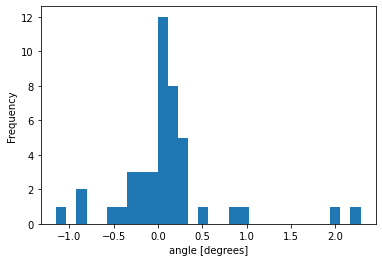

In [149]:
ax = df["angle"].plot(kind="hist",bins=30)
ax.set_xlabel("angle [degrees]")

In [150]:
df[df["angle"]>0]["angle"].mean()

0.32446366666666665

# Comparison of the 2 measurements

In [151]:
diff = df.compare(df2)["angle"]["self"]-df.compare(df2)["angle"]["other"]
#plt.plot(diff,kind="hist",bins=10)
ax = diff.plot(kind="hist")
ax.set_xlabel("angle difference [degrees]")
diff.mean()
diff.std()

KeyError: 'angle'

In [152]:
#df[df["angle"]>0.35]

0.10121863636363636
0.5798838440768574


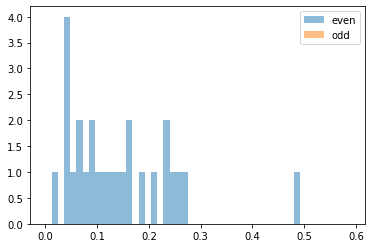

In [153]:


def oddModule():
    out=""
    labels = ["(df['label'].str.find('{}')>=0)".format(i) for i in ["02","04","06","08","10"]]
    return "|".join(labels)

def evenModule():
    out=""
    labels = ["(df['label'].str.find('{}')>=0)".format(i) for i in ["01","03","05","07","09","11"]]
    return "|".join(labels)

#df[(df['label'].str.find("04")>=0)]["angle"].plot(kind="hist")
even = df[(eval(oddModule()))]["angle"]
odd = df[(eval(evenModule()))]["angle"]
print(even.mean())
print(even.std())
ax = plt.hist(even,bins=[0.012*i for i in range(50)],alpha=0.5,label="even")
#ax[0].set_xlabel("angle [degrees]")
plt.hist(odd,bins=[0.012*i for i in range(50)],alpha=0.5,label="odd")
plt.legend()

# Comparison between the 2 measurements

In [154]:
diff = df.compare(df2)["planeity"]["self"]-df.compare(df2)["planeity"]["other"]
#plt.plot(diff,kind="hist",bins=10)
ax = diff.plot(kind="hist",bins=30)
ax.set_xlabel("planarity [mm]")
diff.mean()
diff.std()

KeyError: 'planeity'

## Planeity of inserts

Text(0.5, 0, 'planarity [mm]')

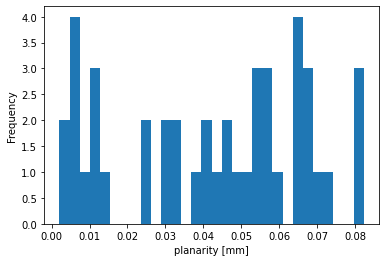

In [155]:
ax = df["planeity"].plot(kind="hist",bins=30)
ax.set_xlabel("planarity [mm]")

In [156]:
df[df["planeity"]>0.1]

,label,angle,planeity


In [157]:
df[df["planeity"]<0.1].mean()

angle       0.101219
planeity    0.042269
dtype: float64

Text(0.5, 0, 'planarity [mm]')

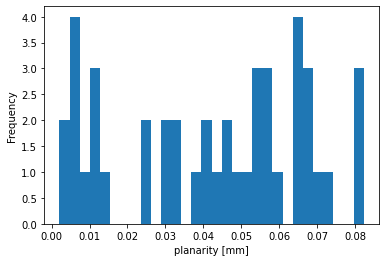

In [158]:
ax = df[df["planeity"]<0.1]["planeity"].plot(kind="hist",bins=30)
ax.set_xlabel("planarity [mm]")

In [159]:
ax2 =((df['label'].str.endswith("S")==False)&(df['label'].str.endswith("E")==False))["planeity"].plot(kind="hist")
ax2.set_xlabel("planeity [mm]")


KeyError: 'planeity'

# Module planarity

Text(0.5, 0, 'angle [degrees]')

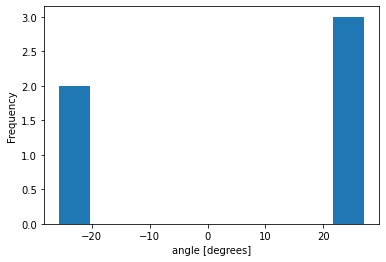

In [160]:
dfm = pd.read_csv("reportModule-v4.csv")
dfm2 = pd.read_csv("reportModule-v2.csv")
ax = dfm["angle"].plot(kind="hist",bins=10)
ax.set_xlabel("angle [degrees]")


Text(0.5, 0, 'planeity [mm]')

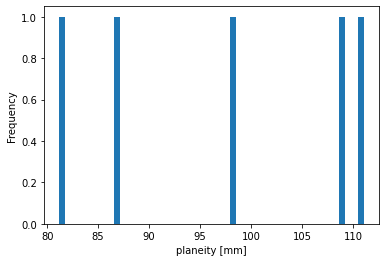

In [161]:
ax = dfm["planeity"].plot(kind="hist",bins=50)
ax.set_xlabel("planeity [mm]")

In [162]:
dfm[dfm["planeity"]>1]

,label,angle,planeity
0,E02,-22.82267,108.92725
1,E04,-25.57612,81.19105
2,E06,24.75296,111.05196
3,E08,26.98723,98.42470
4,E10,26.68823,86.56905


Text(0.5, 0, 'planeity [mm]')

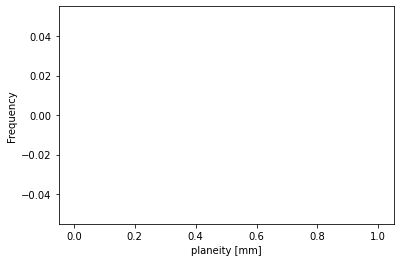

In [163]:
ax = dfm[dfm["planeity"]<1]["planeity"].plot(kind="hist",bins=10)
ax.set_xlabel("planeity [mm]")

# Comparison between the 2 measurements

In [164]:
diff = dfm.compare(dfm2)["planeity"]["self"]-dfm.compare(dfm2)["planeity"]["other"]
print(dfm.compare(dfm2)["planeity"])
#plt.plot(diff,kind="hist",bins=10)
ax = diff.plot(kind="hist",bins=30)
ax.set_xlabel("planarity [mm]")
diff.mean()
diff.std()

ValueError: Can only compare identically-labeled DataFrame objects

## Holes positions

In [165]:
dfh = pd.read_csv("Proto2/Holes.csv",";")

In [166]:
print(dfh.keys())
dfh

Index(['Module', 'A-x', 'A-y', 'B-x', 'B-y', 'C-x', 'C-y', 'D-x', 'D-y'], dtype='object')


,Module,A-x,A-y,B-x,B-y,C-x,C-y,D-x,D-y
0,4,0,0,0,102.93,93.02,102.83,93.01,0.07
1,8,0,0,0,103.01,93.02,102.91,92.98,0.06
2,9,0,0,0,102.96,93.02,102.85,92.99,0.05
3,5,0,0,0,102.90,92.97,103.01,92.97,0.12


## Entraxe A-B  C-D

<AxesSubplot:ylabel='Frequency'>

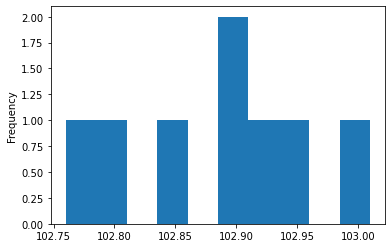

In [167]:
(dfh["B-y"]-dfh["A-y"]).append(dfh["C-y"]-dfh["D-y"]).plot(kind="hist")

mean =  102.8875
stdev =  0.08241879119992747


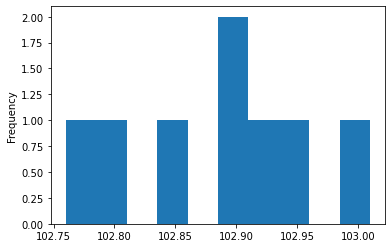

In [168]:
a = (dfh["B-y"]-dfh["A-y"]).append(dfh["C-y"]-dfh["D-y"])
a.plot(kind="hist")
print("mean = ",a.mean())
print("stdev = ",(a.std()))

mean =  92.9975
stdev =  0.022519832529190965


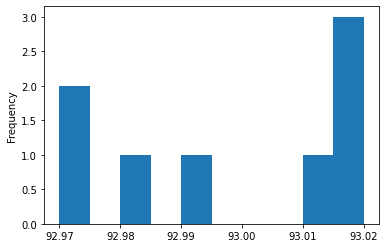

In [169]:
a = (dfh["D-x"]-dfh["B-x"]).append(dfh["C-x"]-dfh["A-x"])
a.plot(kind="hist")
print("mean = ",a.mean())
print("stdev = ",(a.std()))

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
dfp = pd.read_csv("points.csv")

In [171]:
dfp

,letter,module,face,x,y,z
0,A,2,F1,-1071.232,2.057,131.412
1,A,2,F2,-1056.550,2.057,131.411
2,A,2,F3,-1056.595,2.040,125.955
3,A,2,F4,-1063.219,1.966,125.985
4,A,2,F5,-1072.127,1.976,128.924
...,...,...,...,...,...,...
242,E,10,H2,-180.064,1.989,27.180
243,E,10,H3,-179.992,2.053,25.499
244,E,10,H4,-181.585,2.025,24.311
245,E,10,H5,-184.527,1.985,25.623


In [200]:
#dfp[dfp["face"].str.startswith('E')]
dfp[dfp["letter"].str.match('E')]

,letter,module,face,x,y,z,point
43,E,2,F1,-973.108,1.968,28.019,E02F1
44,E,2,F2,-965.870,1.964,28.030,E02F2
45,E,2,F3,-956.880,2.045,25.881,E02F3
46,E,2,F4,-957.561,2.062,23.215,E02F4
47,E,2,F5,-972.684,2.060,23.192,E02F5
48,E,2,H1,-967.452,2.038,28.097,E02H1
49,E,2,H2,-965.314,1.965,27.180,E02H2
50,E,2,H3,-965.242,2.046,25.499,E02H3
51,E,2,H4,-966.835,2.002,24.311,E02H4
52,E,2,H5,-969.777,1.964,25.623,E02H5


In [173]:
#(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('B'))]["y"])
(dfp[(dfp["y"]<4)&(dfp["face"].str.startswith('H'))]["y"]).std()

0.03618288680494066

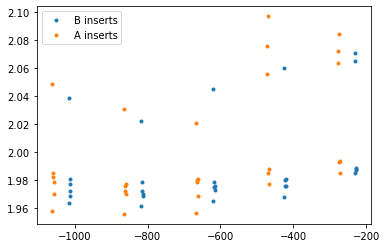

In [174]:
y = (dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('B'))]["x"])
x = abs(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('B'))]["y"])
ax = plt.plot(y,x,linestyle = 'None', marker='o',label="B inserts",markersize=3)
y = (dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('A'))]["x"])
x = abs(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('A'))]["y"])
ax = plt.plot(y,x,linestyle = 'None', marker='o',label="A inserts",markersize=3)
#y = abs(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('C'))]["y"])
#x= abs(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('C'))]["z"])
#ax = plt.plot(x,y,linestyle = 'None', marker='s',label="C inserts")
plt.legend()

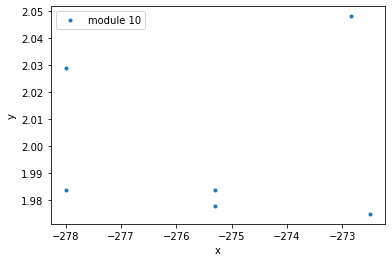

In [175]:
x = (dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["x"])
y = abs(dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["y"])
ax = plt.plot(x,y,linestyle = 'None', marker='o',label="module 10",markersize=3)
plt.xlabel("x")
plt.ylabel("y")
#x = (dfp[(dfp["module"]==2)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["x"]+780)
#y = abs(dfp[(dfp["module"]==2)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["y"])
#ax = plt.plot(x,y,linestyle = 'None', marker='o',label="module 2",markersize=3)
#y = (dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('E'))]["y"])
#x = abs(dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('E'))]["x"])
#ax = plt.plot(x,y,linestyle = 'None', marker='o',label="E inserts",markersize=3)
plt.legend()

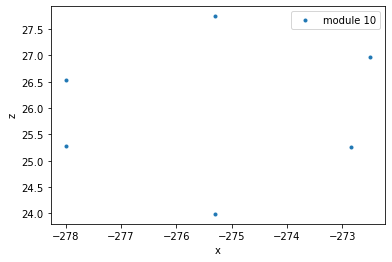

In [176]:
x = (dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["x"])
y = abs(dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["z"])
ax = plt.plot(x,y,linestyle = 'None', marker='o',label="module 10",markersize=3)
plt.xlabel("x")
plt.ylabel("z")
#x = (dfp[(dfp["module"]==2)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["x"]+780)
#y = abs(dfp[(dfp["module"]==2)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["y"])
#ax = plt.plot(x,y,linestyle = 'None', marker='o',label="module 2",markersize=3)
#y = (dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('E'))]["y"])
#x = abs(dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('E'))]["x"])
#ax = plt.plot(x,y,linestyle = 'None', marker='o',label="E inserts",markersize=3)
plt.legend()

module 2 angle -1.2618847833659976
module 4 angle 0.0029861052621783825
module 6 angle -0.010300548305408325
module 8 angle 0.059967271820849925
module 10 angle -0.10217097916022518


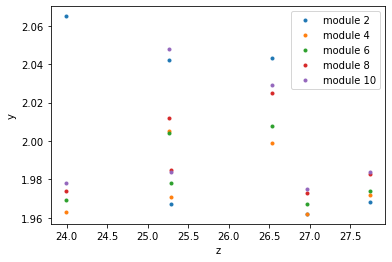

In [177]:
from scipy.optimize import curve_fit
import math as m
import numpy as np

def f(x, a, b):
    return a + b*x

def GetAngle(x, y):
    pars, cov_pars = curve_fit(f, x, y)
    return m.degrees(m.asin(pars[1]))

def ViewInsert(xaxis,yaxis,module,insert,face,fit=True):
    x = (dfp[(dfp["module"]==module)&(dfp["face"].str.startswith(face))&(dfp["letter"].str.match(insert))][xaxis])
    y = abs(dfp[(dfp["module"]==module)&(dfp["face"].str.startswith(face))&(dfp["letter"].str.match(insert))][yaxis])
    ax = plt.plot(x,y,linestyle = 'None', marker='o',label="module "+str(module),markersize=3)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    if fit:
        angle = GetAngle(x,y)
        print("module",module,"angle",angle)
    
for module in range(2,11,2):
    ViewInsert("z","y",module,"D","H")    


plt.legend()

module 2 angle -1.2618847833659976
module 4 angle 0.0029861052621783825
module 6 angle -0.010300548305408325
module 8 angle 0.059967271820849925
module 10 angle -0.10217097916022518


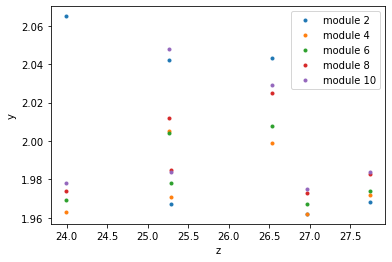

In [178]:
#for module in range(1,10,2):
for module in range(2,11,2):

    ViewInsert("z","y",module,"D","H")    


plt.legend()

module 2 angle 0.16090572530664668
module 2 angle 0.16076152774069735
module 2 angle -0.30935133854576014
module 2 angle -1.2618847833659976
module 2 angle 0.3246819844870001
module 4 angle 0.08446688616017133
module 4 angle 0.13637968952124663
module 4 angle -0.2381853684927319
module 4 angle 0.0029861052621783825
module 4 angle -0.4202732903165727
module 6 angle 0.09815172308398418
module 6 angle 0.24583766403949595
module 6 angle -0.3163662780147508
module 6 angle -0.010300548305408325
module 6 angle 0.3948016755301384
module 8 angle -1.368279573581772
module 8 angle 0.325870507497309
module 8 angle 0.6955671525110345
module 8 angle 0.059967271820849925
module 8 angle -0.3845251106818454
module 10 angle -1.1186094410379306
module 10 angle -0.051056466228782696
module 10 angle 0.4151821864093897
module 10 angle -0.10217097916022518
module 10 angle -0.34382839665874226


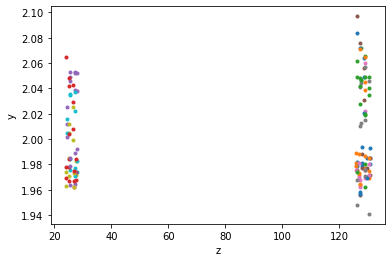

In [179]:
for module in range(2,11,2):
    ViewInsert("z","y",module,"A","H")   
    ViewInsert("z","y",module,"B","H")
    ViewInsert("z","y",module,"C","H")
    ViewInsert("z","y",module,"D","H")
    ViewInsert("z","y",module,"E","H")

#plt.legend()

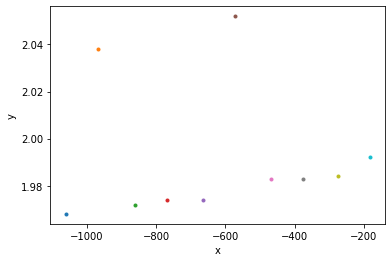

In [180]:
for module in range(2,11,2):
    ViewInsert("x","y",module,"D","H1",fit=False)  
    ViewInsert("x","y",module,"E","H1",fit=False)  

module 10 angle 0.0008408292893045923
module 10 angle 0.0011664570267264096
module 10 angle 0.002523613252768133


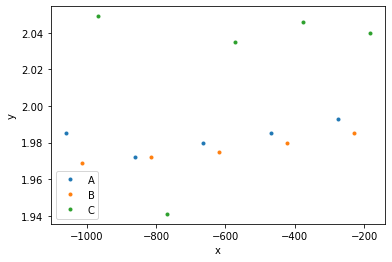

In [181]:
def ViewInsert2(xaxis,yaxis,moduleType,insert,face,label,fit=True):
    x = (dfp[(dfp["module"]%2==moduleType)&(dfp["face"].str.startswith(face))&(dfp["letter"].str.match(insert))][xaxis])
    y = abs(dfp[(dfp["module"]%2==moduleType)&(dfp["face"].str.startswith(face))&(dfp["letter"].str.match(insert))][yaxis])
    ax = plt.plot(x,y,linestyle = 'None', marker='o',label=label,markersize=3)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    if fit:
        angle = GetAngle(x,y)
        print("module",module,"angle",angle)


ViewInsert2("x","y",0,"A","H1","A",fit=True)  
ViewInsert2("x","y",0,"B","H1","B",fit=True)  
ViewInsert2("x","y",0,"C","H1","C",fit=True)  
plt.legend()

module 10 angle 0.001254649417498019
module 10 angle -0.002419319167835356


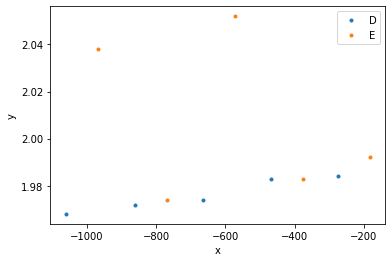

In [182]:
ViewInsert2("x","y",0,"D","H1","D",fit=True)  
ViewInsert2("x","y",0,"E","H1","E",fit=True)  
plt.legend()

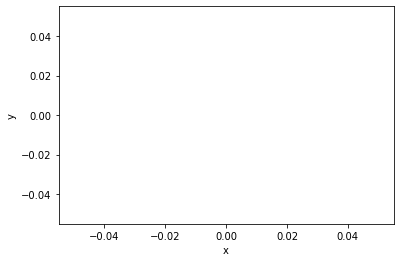

In [183]:
for module in range(1,11,2):
    ViewInsert("x","y",module,"D","H1",fit=False) 

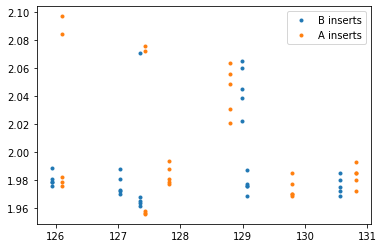

In [184]:
y = (dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('B'))]["y"])
x = abs(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('B'))]["z"])
ax = plt.plot(x,y,linestyle = 'None', marker='o',label="B inserts",markersize=3)
y = (dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('A'))]["y"])
x = abs(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('A'))]["z"])
ax = plt.plot(x,y,linestyle = 'None', marker='o',label="A inserts",markersize=3)
#y = abs(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('C'))]["y"])
#x= abs(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('C'))]["z"])
#ax = plt.plot(x,y,linestyle = 'None', marker='s',label="C inserts")
plt.legend()

In [185]:
dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('B'))&(dfp['y']<1)]


,letter,module,face,x,y,z


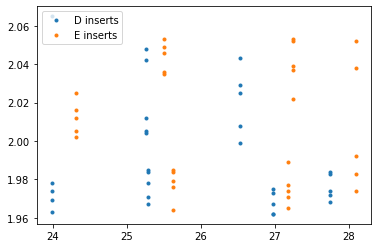

In [186]:
y = (dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["y"])
x = abs(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["z"])
ax = plt.plot(x,y,linestyle = 'None', marker='o',label="D inserts",markersize=3)
y = (dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('E'))]["y"])
x = abs(dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('E'))]["z"])
ax = plt.plot(x,y,linestyle = 'None', marker='o',label="E inserts",markersize=3)
plt.legend()

In [187]:
dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('E'))&(dfp['y']<13)]

,letter,module,face,x,y,z
48,E,2,H1,-967.452,2.038,28.097
49,E,2,H2,-965.314,1.965,27.180
50,E,2,H3,-965.242,2.046,25.499
51,E,2,H4,-966.835,2.002,24.311
52,E,2,H5,-969.777,1.964,25.623
53,E,2,H6,-969.873,2.039,27.239
102,E,4,H1,-768.402,1.974,28.097
103,E,4,H2,-766.264,1.971,27.180
104,E,4,H3,-766.192,2.035,25.499
105,E,4,H4,-767.785,2.005,24.311


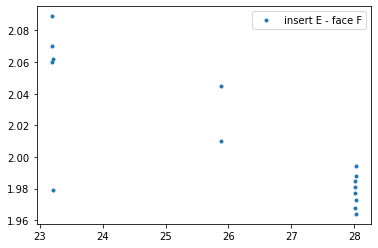

In [188]:
def plot(xvar,yvar,insertlabel,facelabel):
    y = abs(dfp[(dfp["face"].str.startswith(facelabel))&(dfp["letter"].str.match(insertlabel))][yvar])
    x = abs(dfp[(dfp["face"].str.startswith(facelabel))&(dfp["letter"].str.match(insertlabel))][xvar])
    plotlabel = f"insert {insertlabel} - face {facelabel}"
    ax = plt.plot(x,y,linestyle = 'None', marker='o',label=plotlabel,markersize=3)

#faces = ["F","H","S","E"]
faces = ["F","H"]
faces = ["F"]
for f in faces:
    plot("z","y","E",f)
plt.legend()

In [189]:
dfp[(dfp["face"].str.startswith('F'))&(dfp["letter"].str.match('C'))&(abs(dfp['y'])>13.5
                                                                    )]

,letter,module,face,x,y,z


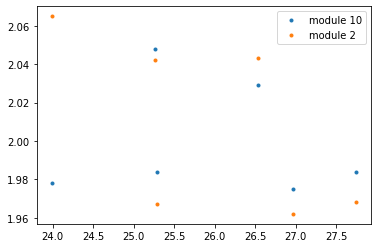

In [190]:
y = (dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["y"])
x = abs(dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["z"])
ax = plt.plot(x,y,linestyle = 'None', marker='o',label="module 10",markersize=3)
y = (dfp[(dfp["module"]==2)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["y"])
x = abs(dfp[(dfp["module"]==2)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]["z"])
ax = plt.plot(x,y,linestyle = 'None', marker='o',label="module 2",markersize=3)
#y = (dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('E'))]["y"])
#x = abs(dfp[(dfp["module"]==10)&(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('E'))]["x"])
#ax = plt.plot(x,y,linestyle = 'None', marker='o',label="E inserts",markersize=3)
plt.legend()

In [191]:
dfp[(dfp["face"].str.startswith('H'))&(dfp["letter"].str.match('D'))]

,letter,module,face,x,y,z
37,D,2,H1,-1060.556,1.968,27.746
38,D,2,H2,-1057.743,1.962,26.971
39,D,2,H3,-1058.093,2.042,25.259
40,D,2,H4,-1060.559,2.065,23.989
41,D,2,H5,-1063.249,1.967,25.285
42,D,2,H6,-1063.251,2.043,26.533
91,D,4,H1,-861.506,1.972,27.746
92,D,4,H2,-858.693,1.962,26.971
93,D,4,H3,-859.043,2.005,25.259
94,D,4,H4,-861.509,1.963,23.989


# Comparison of points betweem the 2 measurements

In [192]:
list="""
A03F5
A05F1
A05F5
B03F2
B03F3
B03H2
B03H3
C01F2
C03F1
C05F1
E03H2
E03H3
"""
points=list.split()

In [193]:
print(points)

['A03F5', 'A05F1', 'A05F5', 'B03F2', 'B03F3', 'B03H2', 'B03H3', 'C01F2', 'C03F1', 'C05F1', 'E03H2', 'E03H3']


In [194]:
dfp = pd.read_csv("points.csv")
dfp2 = pd.read_csv("points-v2.csv")
dfp["point"]=dfp["letter"].astype(str)+"0"+dfp["module"].astype(str)+dfp["face"]
dfp2["point"]=dfp2["letter"].astype(str)+"0"+dfp2["module"].astype(str)+dfp2["face"]

dfp

,letter,module,face,x,y,z,point
0,A,2,F1,-1071.232,2.057,131.412,A02F1
1,A,2,F2,-1056.550,2.057,131.411,A02F2
2,A,2,F3,-1056.595,2.040,125.955,A02F3
3,A,2,F4,-1063.219,1.966,125.985,A02F4
4,A,2,F5,-1072.127,1.976,128.924,A02F5
...,...,...,...,...,...,...,...
242,E,10,H2,-180.064,1.989,27.180,E010H2
243,E,10,H3,-179.992,2.053,25.499,E010H3
244,E,10,H4,-181.585,2.025,24.311,E010H4
245,E,10,H5,-184.527,1.985,25.623,E010H5


In [195]:
for p in points:
    print(dfp[dfp["point"].astype(str)==p])
    print(dfp2[dfp2["point"].astype(str)==p])

Empty DataFrame
Columns: [letter, module, face, x, y, z, point]
Index: []
    letter  module face        x      y        z  point
115      A       3   F5  955.342  3.042 -119.445  A03F5
Empty DataFrame
Columns: [letter, module, face, x, y, z, point]
Index: []
    letter  module face        x      y        z  point
231      A       5   F1  758.318  3.336 -124.963  A05F1
Empty DataFrame
Columns: [letter, module, face, x, y, z, point]
Index: []
    letter  module face        x      y        z  point
235      A       5   F5  758.152  2.978 -119.445  A05F5
Empty DataFrame
Columns: [letter, module, face, x, y, z, point]
Index: []
    letter  module face        x      y        z  point
123      B       3   F2  874.047  0.534 -125.184  B03F2
Empty DataFrame
Columns: [letter, module, face, x, y, z, point]
Index: []
    letter  module face        x      y        z  point
124      B       3   F3  874.301  1.153 -119.626  B03F3
Empty DataFrame
Columns: [letter, module, face, x, y, z, point]
Index:

<AxesSubplot:>

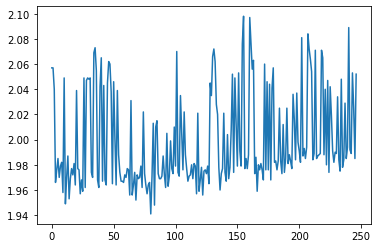

In [199]:
dfp["y"].plot()